<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>NLP Application with DL - Hepsiburada (Ecommerce Platform) Comments</b></p>

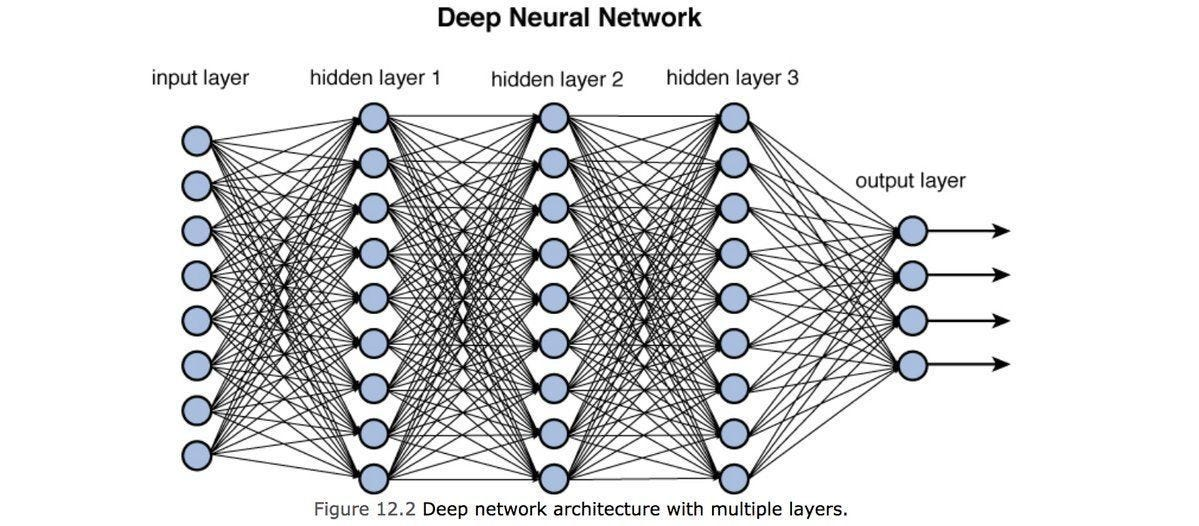

# <font color='orange'> <b>Importing Libraries</b><font color='black'>  

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer            # Tokenizer function of Tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences    # It ensures that the squences we give to the model are the same size.

# <font color='orange'> <b>Loading The Dataset</b><font color='black'>  

**About Dataset**

This dataset consists of customer reviews collected from Hepsiburada, one of Turkey's largest e-commerce platforms. It contains two columns: **Rating** and **Review**. The **Rating** column represents the user rating given to the product, and the **Review** column contains the text of the review written in Turkish. This dataset can be used for various NLP tasks such as sentiment analysis, text classification, and opinion mining.

In [2]:
df = pd.read_csv('hepsiburada.csv')

In [3]:
df.head()

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [4]:
df.sample(10)

,Rating,Review
198772,1,Ters köşe dedim ama ters köşe kavramına bile t...
42241,1,Ilk denememizi yaptik ve sonuc cok basarili. A...
201063,1,etkileyici heyacanla katili bulma çabalarında ...
14508,1,telefonu alalı 2 hafta oldu ozellikleri mukemm...
243237,1,bazen yerine oturtamasam da gayet başarılı bir...
208205,1,Orijinal değil diyen arkadaşlar var.Ürün oriji...
564,1,pratik kullanımı kolay cok harika bi tasarım g...
81339,1,maddi durumlardan ötürü yaşlı arabalara binmek...
127515,1,Arkadaşlar başta bende inanmıyordum deneyince ...
47315,1,dört yıldır kullanıyorum şu ana kadar hiçbir p...


# <font color='orange'> <b>Understanding The Data</b><font color='black'>  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243497 entries, 0 to 243496
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  243497 non-null  int64 
 1   Review  243497 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In NLP, there is no specific method for filling missing values. However, data augmentation techniques are available.

In [6]:
df.Rating.value_counts()

Rating
1    229821
0     13676
Name: count, dtype: int64

Here, 1 represents a positive review, and 0 represents a negative review. It is considered more appropriate for the target label to be 1.

When the model starts training with `model.fit`, the validation recall and recall values always follow 1.

In [7]:
df.Rating = df.Rating.map({1:0, 0:1})

This code is used to transform the "Rating" column in a Pandas DataFrame. The given line of code changes the values in the "Rating" column based on a specific mapping logic. According to the mapping logic, values of 1 are converted to 0, and values of 0 are converted to 1. This type of transformation can be used to make the data compatible with a different format or encoding, or to mark the data for a specific analysis or process. In this case, a transformation between 1 and 0 values occurs.

In [8]:
df.Rating.value_counts()

Rating
0    229821
1     13676
Name: count, dtype: int64

In [9]:
df.Rating.value_counts(normalize=True)

Rating
0    0.943835
1    0.056165
Name: proportion, dtype: float64

`normalize=True`: The `value_counts()` function is given the `normalize=True` parameter. This allows the results to be normalized in percentage terms. Each value is expressed as a ratio of the total values.

---

**VERY IMBALANCED DATASET**

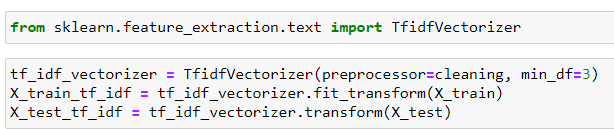

# <font color='orange'> <b>Data Preparation</b><font color='black'>  

## <font color='sandybrown'> <b>Tokenization</b><font color='black'>  

In [10]:
X = df['Review'].values    # In Deep Learning, .values ​​are added to convert data into array.
y = df['Rating'].values

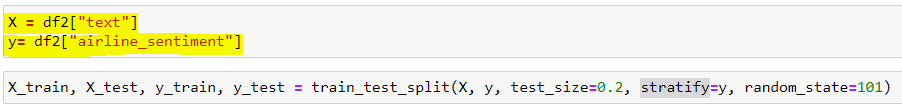

In this way, DataFrame data is converted into a NumPy array and can be used as input for a deep learning model.

### <font color='gold'> <b>Total Words</b><font color='black'>  

In [11]:
total = Tokenizer()
total.fit_on_texts(df['Review'])

# Learning the total word count
total_words = len(total.word_index)
print("Total word count:", total_words)

Total word count: 217983


In [12]:
num_words= 15000   #  The first 15,000 most used words (tokens) in the corpus will be taken and the rest will be ignored.

GloVe's vector space was built from 400k words, while our `airline_tweets` data had about 9k unique words, which was reduced to around 3k after cleaning.

In [13]:
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 
# If the value None is assigned, all words are taken into account.

Using the `num_words` parameter allows only the most common words to be recognized by the Tokenizer, and others to be ignored. This helps control memory usage and allows the model to focus more on meaningful information. Therefore, it can be helpful to use the `num_words` parameter when working with large datasets or when facing memory limitations.

For example, setting `num_words=15000` means the tokenizer will only consider the 15,000 most frequent words and ignore the rest. This can be beneficial for processing more words and preventing unnecessary information from being retained, especially if you have a large vocabulary.

**ONLY THE FIRST 15,000 TOKENS WILL BE PROCESSED BY THE TOKENIZER.**

---

In ML, we performed text cleaning using stop words, punctuation, stemming, case normalization, etc.; however, in DL, we do not handle these tasks manually as Keras performs them for us.

Lemmatization and stemming are not done in deep learning!

The output below corresponds to the manual steps we performed in the ML part.

In [14]:
# Tokenizer function developed by Tensorflow itself.
# First indexed then tokenized.
tokenizer.fit_on_texts(X)     

## <font color='sandybrown'> <b>Creating Word Index</b><font color='black'>  

SORTING THE MOST USED ONES BY THEIR FREQUENCY OF USAGE.

In [15]:
tokenizer.word_index                 # Sorts starting from the most common word

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

`tokenizer.fit_on_texts(X)` and `tokenizer.texts_to_sequences(X)` represent two different operations with different purposes:

**`tokenizer.fit_on_texts(X)`:**

This operation works on the provided text data (X) and creates the internal word indices of the Tokenizer.
It creates a dictionary that maps each word to a number. This dictionary allows each unique word in the text to be associated with a numerical index.
This operation determines which indices the Tokenizer will use to convert words into numerical sequences.
It is typically performed on the training data and ensures that all unique words in the training data are recognized by the Tokenizer.

**`tokenizer.texts_to_sequences(X)`:**

This operation converts the provided text data into numerical sequences using the words recognized by the Tokenizer.
It can only be used after the `fit_on_texts(X)` operation is completed, as the Tokenizer now understands the words in the text.
It replaces each word with its corresponding numerical index and converts each sentence or text into numerical sequences.
This operation is used to feed the text data into machine learning or deep learning models.

In summary, `fit_on_texts(X)` allows the Tokenizer to understand the words in the text, while `texts_to_sequences(X)` converts the text data into numerical sequences using the words recognized by the Tokenizer. The second step can only be performed after completing the first step.

## <font color='sandybrown'> <b>Converting Tokens to Numeric</b><font color='black'>  

In [84]:
# First indexing with fit_on_texts and then sorting in numerical form with texts_to_sequences without breaking the structure.

In [16]:
X_num_tokens = tokenizer.texts_to_sequences(X)   # Tokenize text

The `tokenizer.texts_to_sequences(X)` code line is used to convert text data into numerical sequences. Let's break down what this code does step by step:

**`tokenizer`:**
A pre-defined Tokenizer object. This object is used to transform text data.

**`X`:**
The text data to be converted. This text data should be in a list or array format, where each item represents a text document or sentence.

**`tokenizer.texts_to_sequences(X)`:**
This method uses the Tokenizer object to convert the text data into numerical sequences. It creates an array where each word or token (each element of the text) is represented by a number. Each word has a specific numerical value in this array. This is useful for representing text data numerically and is typically necessary when feeding the data into machine learning models.

In [17]:
X_num_tokens

[[52, 462, 1617, 4510],
 [52, 462, 55, 584],
 [4,
  234,
  29,
  150,
  1,
  76,
  3717,
  1698,
  274,
  82,
  4689,
  10517,
  77,
  187,
  295,
  2020,
  8,
  262,
  5957,
  433,
  1,
  7,
  280,
  1041,
  8857,
  11,
  648,
  78,
  1221,
  225,
  23,
  5,
  1763,
  1,
  1568,
  64,
  68,
  1,
  6,
  5,
  1754,
  893,
  127,
  288,
  1348,
  119,
  20,
  3684,
  5028,
  31,
  172,
  4077,
  4859,
  1930,
  9977,
  25,
  8329,
  3,
  5,
  9977,
  57,
  1696,
  174,
  595,
  16,
  1816],
 [343, 253, 97, 11641, 33, 2623, 55],
 [494, 1, 1, 6, 1350, 53],
 [14, 7],
 [1, 24, 2, 4, 3, 67, 13, 22, 72, 3480, 917, 17, 3, 1, 81],
 [164, 65, 1049, 55, 2075, 13779, 149, 6989, 4510, 65, 339, 11, 1855, 99, 178],
 [4,
  494,
  208,
  8,
  1,
  22,
  771,
  330,
  38,
  186,
  262,
  18,
  367,
  1863,
  3,
  494,
  208,
  8,
  995,
  587,
  651,
  176,
  1147,
  11148,
  65,
  184,
  164,
  250,
  85,
  389,
  26,
  192,
  1856,
  262,
  884,
  34],
 [19,
  2,
  921,
  7547,
  4954,
  160,
  23,
  5

In [18]:
X[105]   # 27

'Logitech ürünlerinin geneli kalite olarak çok iyidir. Adedini tam saymadım ama 10 un üzerinde kendime akrabalarıma arkadaşlarıma almışımdır hepside memnunlar. İhtiyacı olan kaçırmasın başkada ürün aramasın derim.'

The word count above does not match the index count below because we limited it to 15,000 words.

In [19]:
print(X_num_tokens[105])    # 22

[1816, 5360, 131, 23, 1, 1849, 74, 12, 118, 1533, 297, 745, 3216, 13402, 6326, 5030, 2463, 113, 2534, 8858, 4, 143]


In [20]:
reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}
word = reverse_word_index[1]
print(word)

çok


In [21]:
reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}
word = reverse_word_index[1816]
print(word)

logitech


In [22]:
len(X_num_tokens[105])

22

In [23]:
len(X_num_tokens[106])

18

In [24]:
len(X_num_tokens[6150])

88

**TO DETERMINE THE NUMBER OF TOKENS IN ALL COMMENTS:**

In [25]:
num_tokens = [len(tokens) for tokens in X_num_tokens]   # Take each token in X_num_tokens (from the comments) and count the length...
num_tokens = np.array(num_tokens)                       # Convert to an array for easier operations like mean, max, etc.

`num_tokens = [len(tokens) for tokens in X_num_tokens]`: This loop calculates the number of words in each example of the `X_num_tokens` list by using `len(tokens)`. Let's assume `X_num_tokens` is a list, where each item is a sequence of tokens resulting from a process that splits a text document into tokens.

`num_tokens = np.array(num_tokens)`: Converts the list of word counts (`num_tokens`) into a NumPy array using the `np.array()` function. This allows us to leverage NumPy's functions for easier manipulation and analysis of the numbers.

This code snippet calculates the word count for each example in the text dataset and converts these counts into a NumPy array. This can be used to analyze the word counts of the examples and compute statistical information.

In [26]:
num_tokens

array([ 4,  4, 66, ...,  4, 10, 38])

In [27]:
random_sample = np.random.choice(num_tokens)

print(random_sample)

2


In [28]:
len(num_tokens)

243497

Just like how we define a common size for images in CNN, let's select an average length that captures most of the data before model training (around 95%).

## <font color='sandybrown'> <b>Maximum Number of Tokens for All Documents</b><font color='black'>  

In [29]:
num_tokens.mean()

21.36101060793357

In [30]:
num_tokens.max()

298

In [31]:
num_tokens.argmax() # Finding the index of the longest comment in the list with argmax.

21941

In [32]:
X[21941]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [33]:
len(X_num_tokens[21941])

298

In [34]:
max_tokens = 65

In [35]:
sum(num_tokens < max_tokens) / len(num_tokens)  # 235.221 / 243.497 

0.9660119015840031

If we choose `max_tokens = 65`, we get about 97% of our data. We determined this number of 65 by trying it based on the statistical outputs above.

In [36]:
sum(num_tokens < max_tokens)

235221

In [37]:
len(num_tokens)

243497

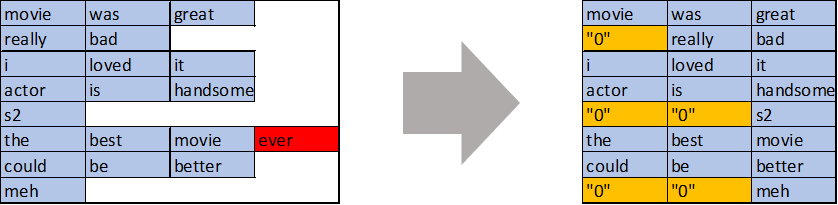

This is just to help you visualize. For long documents, it will take the last 65 words, and for shorter documents, it will pad the beginning with zeros to make up a total of 65.

## <font color='sandybrown'> <b>Fixing Token Counts of All Documents (pad_sequences)</b><font color='black'>  

In [38]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)   #  fixing

This code fills (pads) or truncates the text samples in a text dataset to a specific maximum length (max_tokens) based on a sequence of tokens.

The steps of the function are as follows:

`X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)`: The `pad_sequences` function takes each example in the text dataset `X_num_tokens` and pads or truncates it to the maximum length specified by the `maxlen` parameter.

- `X_num_tokens`: A list containing token sequences for each example in the text dataset.
- `maxlen`: The target maximum number of tokens after padding or truncation.

The `pad_sequences` function pads shorter token sequences with zeros (0) at the beginning or end to make them the same length, while longer token sequences are truncated, meaning they are cut off at the maximum length.

`X_pad`: The variable assigned to the resulting NumPy array containing the padded or truncated token sequences.

As a result, this code creates a new array by padding or truncating each example in the text dataset to a specific maximum token count (`max_tokens`). This ensures that the text data has a fixed length, which can then be used for machine learning models.

In [39]:
X_pad.shape

(243497, 65)

In [40]:
y.shape

(243497,)

In [41]:
np.array(X_num_tokens[800])

array([  19,  341,   52,  194,   30,   54, 7992,   55,  209,  603, 7887,
          3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,    2,
        380,  326,    3,    1,   81,  132,  562,    9,   10])

In [42]:
X_pad[800]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,   19,  341,   52,  194,   30,   54, 7992,   55,  209,  603,
       7887,    3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,
          2,  380,  326,    3,    1,   81,  132,  562,    9,   10],
      dtype=int32)

In [43]:
np.array(X_num_tokens[21941])

array([  145,     5,  5876,  2225,  1653,   902,   203,     1,     6,
        2958,   163,  4248,   374,  3449,  1521, 12582,     3,  1381,
           1,   491,   281,   140,     1,   491,  3391,  2388,   235,
          21,    82,   756,    31,   212,  4458,  1448,    14,     6,
         472,   609,  2159,    14,    15,   673,  1681,  2152,     3,
         313,   444,   261,    13,   561,   463,   470,  1664,   168,
         639,   519,  3209,  5455,  6409,   600,   625,   153,    38,
         194,   272,   635,   389,   140,    26,    52,    40,   272,
          15,    84,    38,   466,  1679, 12350,  1036,   999,     3,
          96,     2,   318,    34,   134,   169,    40,  2752,     3,
          77,   750,   168,   881,     3,   509,   571,   359,   195,
           1,   491,     3,   172,    82,   256,  6460,    45,   926,
         195,  2061,  6575,   603,  7031,   235,    21,   103,   931,
         136,   394,  1316,  1917,     5,  2167,   567,  1034,  2217,
          26,   335,

In [44]:
X_pad[21941]   # Getting the last 65 on long ones

array([  34,  902, 1869,  287,  872, 3501,  537, 1804,  488, 2218,   75,
        163,    2,  456,   13, 1308, 1865, 3432,    5,  824, 7798,  836,
       1640, 7838, 3344,   12, 1308,   31, 3063,  299, 2704,  851, 1052,
         39, 1490, 3436,  317, 1170,   75,  537,   50,  327,  246, 1322,
        120,    2, 3436, 7527,  199,  260,  579, 6176, 1800,   13,   45,
        808,  108,    3,  865,  749, 5840,   50,  106,   76,  879],
      dtype=int32)

# <font color='orange'> <b>Modeling</b><font color='black'>  

## <font color='sandybrown'> <b>Train | Test Split</b><font color='black'>  

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=0)

## <font color='sandybrown'> <b>Building LSTM Model</b><font color='black'>  

In [47]:
model = Sequential()

In [48]:
embedding_size = 50           # The number of features for each token
                              # By adjusting the EMBEDDING SIZE, we can prevent overfitting.

In [132]:
# pip install -U numpy==1.19.5   # Those who have problems at this stage can install it.

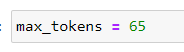

In [49]:
max_tokens

65

In [50]:
from tensorflow.keras.layers import Embedding, Dropout, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Embedding(input_dim=num_words,          # Total number of words in the vocabulary
                    output_dim=embedding_size,    # The number of features for each word
                    ))                            # Number of words in each document (comment)

model.add(Dropout(0.2))

# First hidden layer
model.add(Bidirectional(LSTM(units=48, return_sequences=True)))
model.add(Dropout(0.2))

# Second hidden layer
model.add(Bidirectional(LSTM(units=24, return_sequences=True)))
model.add(Dropout(0.2))

# Third hidden layer
model.add(Bidirectional(LSTM(units=12)))

model.add(Dense(1, activation='sigmoid'))

In [51]:
optimizer = Adam(learning_rate=0.01)          # Can make modifications for overfitting.

In [52]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [53]:
model.summary() 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_Recall", mode="max",   # mode="auto" also follows the trend. 
                           verbose=1, patience=2, restore_best_weights=True)

**mode**: It is used to determine whether to maximize or minimize the monitored metric. When set to "max," the monitored metric (e.g., validation accuracy) is aimed to be maximized. When set to "min," the metric is aimed to be minimized (e.g., validation loss).

In [58]:
from sklearn.utils import class_weight             # Since the data is imbalanced, a new weighting is applied.
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.52975426, 8.90215702])

The `class_weight.compute_sample_weight` function calculates class weights on an imbalanced dataset. This function is used to address the imbalance between classes in the dataset. The weights calculated for each data sample can help the model emphasize rare classes more, thereby improving accuracy.

**Parameter meanings**:

- **class_weight**: A parameter that determines how the class weights should be calculated. When set to "balanced," it automatically detects the imbalance between classes and calculates the weights. Another option is to specify custom weights for each class using a dictionary.
- **y**: The array of labels (target variable).

The `class_weight.compute_sample_weight` function returns the computed class weights for each data point. These weights vary depending on the class labels and give higher weight to rare classes in an imbalanced dataset.

The `pd.Series(classes_weights).unique()` code returns the unique values of the computed class weights. This allows us to see how the weights change for different classes.

[Keras FAQ](https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss)

In [59]:
model.fit(X_train, y_train, epochs=10, batch_size=256, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - Recall: 0.9765 - loss: 0.0856 - val_Recall: 0.7503 - val_loss: 0.1745
Epoch 2/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - Recall: 0.9751 - loss: 0.0869 - val_Recall: 0.7484 - val_loss: 0.1685
Epoch 3/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - Recall: 0.9746 - loss: 0.0888 - val_Recall: 0.7671 - val_loss: 0.1856
Epoch 4/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - Recall: 0.9764 - loss: 0.0831 - val_Recall: 0.7346 - val_loss: 0.1736
Epoch 5/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - Recall: 0.9702 - loss: 0.0912 - val_Recall: 0.7163 - val_loss: 0.1610
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 3.


## <font color='sandybrown'> <b>Model Evaluation</b><font color='black'>  

In [60]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,Recall,loss,val_Recall,val_loss
0,0.975322,0.090763,0.750274,0.174538
1,0.973768,0.090638,0.748446,0.168458
2,0.973311,0.091341,0.767093,0.185591
3,0.973494,0.090735,0.734552,0.173569
4,0.971666,0.092628,0.716271,0.160966


This table shows how loss and recall values change during the model's training and validation phases. The first row represents the results of the first training iteration, the second row represents the results of the second iteration, and the third row represents the results of the third iteration.

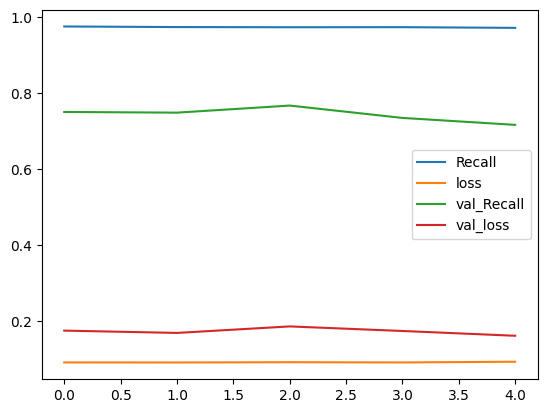

In [61]:
model_loss.plot();

In [62]:
model.evaluate(X_train, y_train)

6088/6088 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - Recall: 0.9853 - loss: 0.0755


[0.07604251801967621, 0.9854674935340881]

In [63]:
model.evaluate(X_test, y_test)

1522/1522 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - Recall: 0.7588 - loss: 0.1848


[0.18559078872203827, 0.7670932412147522]

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

6088/6088 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step
[[179739   4117]
 [   159  10782]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    183856
           1       0.72      0.99      0.83     10941

    accuracy                           0.98    194797
   macro avg       0.86      0.98      0.91    194797
weighted avg       0.98      0.98      0.98    194797



In [65]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

1522/1522 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step
[[43951  2014]
 [  637  2098]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     45965
           1       0.51      0.77      0.61      2735

    accuracy                           0.95     48700
   macro avg       0.75      0.86      0.79     48700
weighted avg       0.96      0.95      0.95     48700



1522/1522 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step


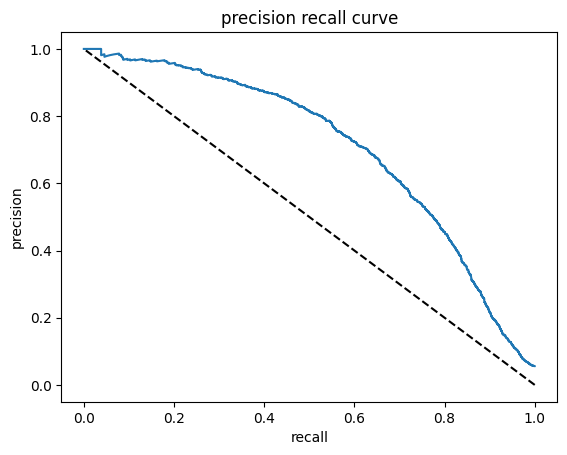

In [66]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba,)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [67]:
average_precision_score(y_test, y_pred_proba)

0.7070014808230812

# <font color='orange'> <b>Prediction</b><font color='black'>  

**Since the data set is in Turkish, new Turkish comments have been added for the prediction process.**

In [68]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "üründe sıkıntı var"
review13 = "televizyonun görüntü kalitesi çok kötü, dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. "
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [69]:
tokens = tokenizer.texts_to_sequences(reviews)

In [70]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(14, 65)

In [71]:
(model.predict(tokens_pad) >0.5).astype("int")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>